In [2]:
### 数据集划分

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)
X_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    ## ... 这里可以有多个X,y
    test_size=0.2,  ##测试比例
    random_state=42,  ## 随机seed
    shuffle=True ## 是否打乱
)
print(X_train.shape, y_train.shape, x_test.shape, y_test.shape)


(150, 4) (150,)
(120, 4) (120,) (30, 4) (30,)


In [3]:
### 交叉验证
## 防止数据集划分不均匀,特殊样本没有被训练或者预测.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as metrics

print(metrics.get_scorer_names())

logreg = RandomForestClassifier(n_estimators=1000)
### cross_val_score
## 二分类的时候,直接使用precision, recall
## 多分类的时候,需要在后面加上_micro, _macro等
## 在多类和多标签的情况下，F1 score是每一类F1平均值，其权重取决于average参数（recall、precision均类似）。
#
#average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’
#
#'binary': 适用于二分类
#'micro': 通过计算真阳性、假阴性和假阳性的总数，在全局范围内计算指标；
#'macro':计算每个标签的度量，并找到它们的非加权平均值，不考虑标签的不平衡性；
#'weighted': 计算每个标签的指标，并找到它们的平均数，按每个标签的真实实例数加权，考虑标签的不平衡；它可能导致F分数不在精确性和召回率之间；
#'samples': 计算每个实例的指标，并找出其平均值，与accuracy_score不同，只有在多标签分类中才有意义；

accuracy = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
precision = cross_val_score(logreg, X_train, y_train, cv=5, scoring='precision_macro')
recall = cross_val_score(logreg, X_train, y_train, cv=5, scoring='recall_macro')
f1_macro = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1_macro')
f1_weighted = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1_weighted')
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1_macro:', f1_macro)
print('f1_weighted:', f1_weighted)
print("*"*50)

y_pred = cross_val_predict(logreg, X_train, y_train, cv=5)
print(y_pred)
print(metrics.classification_report(y_train, y_pred))
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.accuracy_score(y_train, y_pred))
print(metrics.precision_score(y_train, y_pred, average='macro'))
print(metrics.recall_score(y_train, y_pred, average='macro'))
print(metrics.f1_score(y_train, y_pred, average='macro'))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [4]:
## 交叉验证的指标
# 精确度(accuracy): 分类正确的样本数/总样本数
# 查准率(precision): 针对每个类别,预测正确的样本数/预测该类别的样本数
# eg: 100个样本,0类别真实有25个,预测0类别的个数是23个,预测正确的21个,precision=21/23
# precision = tp / (tp + fp)
# 召回率(recall):针对每个类别,预测正确的样本数/实际存在的样本数
# eg: 100个样本,0类别真实有25个,预测0类别的个数是23个,预测正确的21个,recall=21/25
# recall = tp / (tp + fn)
# f1得分: 2*查准率*召回率/(查准率+召回率)=2PR/(P+R)

[[40  0  0]
 [ 0 37  4]
 [ 0  2 37]]


<Figure size 640x480 with 0 Axes>

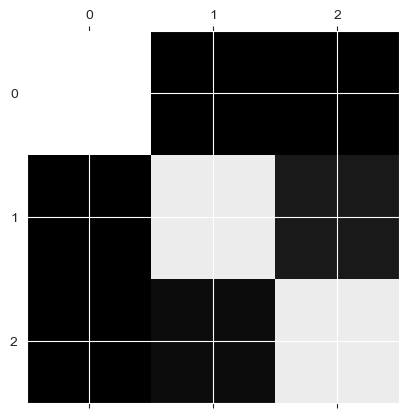

In [5]:
## 混淆矩阵
## 理想的混淆矩阵,就是只有对角线上有值,其他都没值,代表全部预测正确
## 不理想的混淆矩阵,如下:
#       A_pred   B_pred   C_pred
#  A      3        1        1
#  B      0        4        2
#  C      0        0        7

#查准率=主对角线上的值/该值所在列的和
#召回率=主对角线上的值/该值所在行的和
#metrics.confusion_matrix
#混淆矩阵可视化
#plt.matshow(cm, cmap='gray')
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)
plt.figure()
plt.matshow(cm, cmap='gray')
plt.show()

交叉验证结果:
                    模型     平均准确率       标准差
0  LogisticRegression  0.760667  0.027921
1          GaussianNB  0.737333  0.022351

各折详细准确率:
LogisticRegression: [0.72333333 0.80333333 0.76       0.77666667 0.74      ]
GaussianNB: [0.73       0.77       0.71666667 0.75666667 0.71333333]


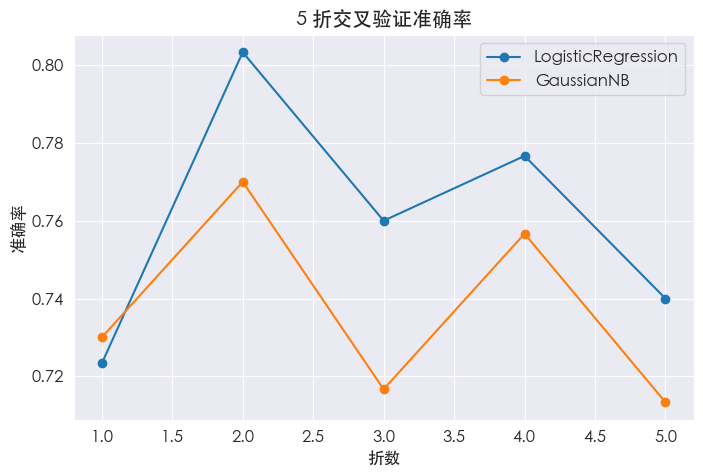

In [6]:
## 交叉验证 -- 举例
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成三分类数据集
X, y = make_classification(
    n_samples=1500, n_features=3, n_informative=3, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)

# 2. 使用 np.column_stack 构造特征矩阵
features = ['年龄', '收入', '浏览时间']
X = np.column_stack((X[:, 0], X[:, 1], X[:, 2]))

# 3. 特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. 定义模型
models = [
    ('LogisticRegression', LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)),
    ('GaussianNB', GaussianNB())
]

# 5. 设置交叉验证（StratifiedKFold，5 折）
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. 进行交叉验证
results = []
for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results.append({
        '模型': name,
        '平均准确率': scores.mean(),
        '标准差': scores.std(),
        '各折准确率': scores
    })

# 7. 输出结果
results_df = pd.DataFrame(results)
print("交叉验证结果:\n", results_df[['模型', '平均准确率', '标准差']])
print("\n各折详细准确率:")
for idx, row in results_df.iterrows():
    print(f"{row['模型']}: {row['各折准确率']}")

# 8. 可视化交叉验证分数
plt.figure(figsize=(8, 5))
for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    plt.plot(range(1, 6), scores, marker='o', label=name)
plt.xlabel('折数')
plt.ylabel('准确率')
plt.title('5 折交叉验证准确率')
plt.legend()
plt.grid(True)
plt.show()

[[-1.44351598 -0.28126093 -0.26002464]
 [ 2.41433974 -0.18519883  0.9259874 ]
 [-2.68607735 -0.46786469  0.96404181]
 ...
 [-0.12974609 -2.14190537 -2.31783168]
 [-1.47436779 -0.45597116 -0.57717113]
 [ 0.01569317 -1.67805048  0.41527468]] [2 1 0 ... 2 2 1]
[[-1.44351598 -0.28126093 -0.26002464]
 [ 2.41433974 -0.18519883  0.9259874 ]
 [-2.68607735 -0.46786469  0.96404181]
 ...
 [-0.12974609 -2.14190537 -2.31783168]
 [-1.47436779 -0.45597116 -0.57717113]
 [ 0.01569317 -1.67805048  0.41527468]]
['高度活跃' '偶尔活跃' '不活跃' ... '高度活跃' '高度活跃' '偶尔活跃']
[2 1 0 ... 2 2 1]
决策树分类性能:
准确率: 0.809
F1 Macro 分数: 0.802

分类报告:
              precision    recall  f1-score   support

         不活跃       0.74      0.69      0.72       139
        偶尔活跃       0.87      0.79      0.83       136
        高度活跃       0.81      0.91      0.86       175

    accuracy                           0.81       450
   macro avg       0.81      0.80      0.80       450
weighted avg       0.81      0.81      0.81       450



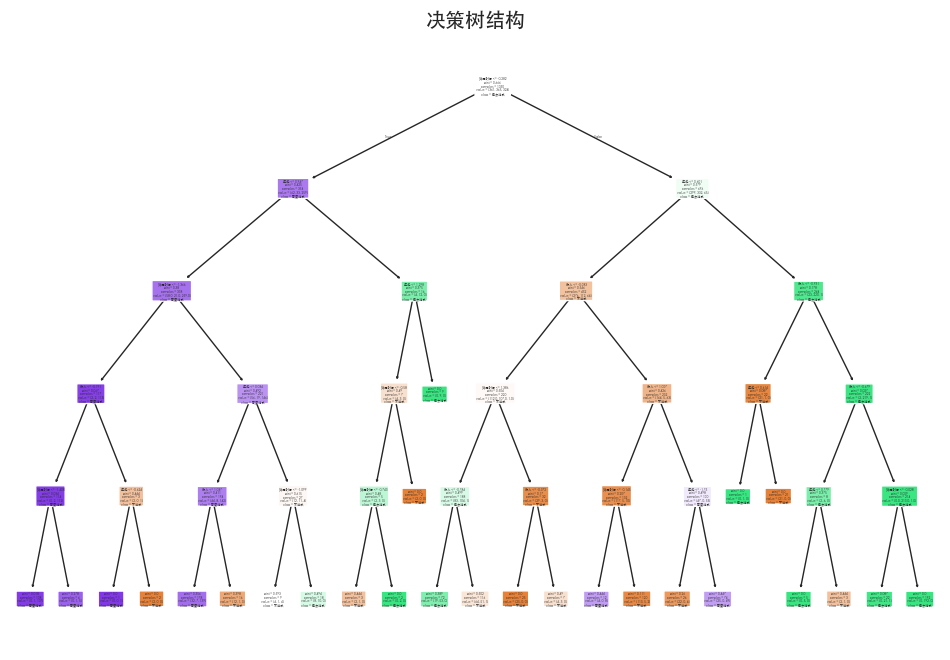


LabelEncoder 映射:
不活跃 -> 0
偶尔活跃 -> 1
高度活跃 -> 2


In [7]:
## 分类报告 -- 决策树分类报告

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. 生成三分类数据集
X, y_numeric = make_classification(
    n_samples=1500, n_features=3, n_informative=3, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)
print(X, y_numeric)

# 2. 使用 np.column_stack 构造特征矩阵
features = ['年龄', '收入', '浏览时间']
X = np.column_stack((X[:, 0], X[:, 1], X[:, 2]))
print(X)

# 3. 构造字符串标签（模拟实际场景）
label_map = {0: '不活跃', 1: '偶尔活跃', 2: '高度活跃'}
y_str = np.array([label_map[y] for y in y_numeric])
print(y_str)

# 4. 使用 LabelEncoder 编码标签
le = LabelEncoder()
y = le.fit_transform(y_str)  # 转换为 [0, 1, 2]
print(y)

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. 特征标准化（决策树不严格要求，但为一致性）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 训练决策树分类器
dt_model = DecisionTreeClassifier(
    max_depth=5,              # 限制深度，防止过拟合
    criterion='gini',         # 使用基尼指数
    random_state=42
)
dt_model.fit(X_train, y_train)

# 8. 预测和评估
y_pred = dt_model.predict(X_test)
y_pred_str = le.inverse_transform(y_pred)  # 转换为原始标签
y_test_str = le.inverse_transform(y_test)

# 9. 计算性能指标
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

# 10. 输出结果
print("决策树分类性能:")
print(f"准确率: {accuracy:.3f}")
print(f"F1 Macro 分数: {f1_macro:.3f}")
print("\n分类报告:")
print(classification_report(y_test_str, y_pred_str, target_names=['不活跃', '偶尔活跃', '高度活跃']))

# 11. 可视化决策树
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=features,
    class_names=le.classes_,
    filled=True,
    rounded=True
)
plt.title("决策树结构")
plt.show()

# 12. 展示 LabelEncoder 的映射
print("\nLabelEncoder 映射:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

随机森林分类性能:
准确率: 0.842
F1 Macro 分数: 0.842

分类报告:
              precision    recall  f1-score   support

         不活跃       0.74      0.81      0.77       139
        偶尔活跃       0.93      0.85      0.89       136
        高度活跃       0.87      0.86      0.86       175

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450



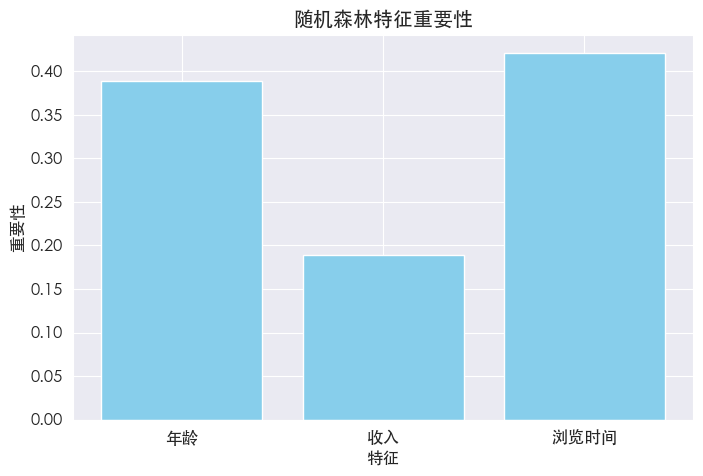


LabelEncoder 映射:
不活跃 -> 0
偶尔活跃 -> 1
高度活跃 -> 2


In [8]:
## 随机森林 -- 重要特征
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1. 生成三分类数据集
X, y_numeric = make_classification(
    n_samples=1500, n_features=3, n_informative=3, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)

# 2. 使用 np.column_stack 构造特征矩阵
features = ['年龄', '收入', '浏览时间']
X = np.column_stack((X[:, 0], X[:, 1], X[:, 2]))

# 3. 构造字符串标签（模拟实际场景）
label_map = {0: '不活跃', 1: '偶尔活跃', 2: '高度活跃'}
y_str = np.array([label_map[y] for y in y_numeric])

# 4. 使用 LabelEncoder 编码标签
le = LabelEncoder()
y = le.fit_transform(y_str)  # 转换为 [0, 1, 2]

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. 特征标准化（随机森林不严格要求，但为一致性）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. 训练随机森林分类器
rf_model = RandomForestClassifier(
    n_estimators=100,         # 100 棵树
    max_depth=5,             # 限制深度，防止过拟合
    random_state=42
)
rf_model.fit(X_train, y_train)

# 8. 预测和评估
y_pred = rf_model.predict(X_test)
y_pred_str = le.inverse_transform(y_pred)  # 转换为原始标签
y_test_str = le.inverse_transform(y_test)

# 9. 计算性能指标
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

# 10. 输出结果
print("随机森林分类性能:")
print(f"准确率: {accuracy:.3f}")
print(f"F1 Macro 分数: {f1_macro:.3f}")
print("\n分类报告:")
print(classification_report(y_test_str, y_pred_str, target_names=['不活跃', '偶尔活跃', '高度活跃']))

# 11. 可视化特征重要性
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(features, importances, color='skyblue')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.title('随机森林特征重要性')
plt.show()

# 12. 展示 LabelEncoder 的映射
print("\nLabelEncoder 映射:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")